In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:07<00:00, 205MB/s]
100% 1.06G/1.06G [00:08<00:00, 141MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [7]:
# Freeze the convolutional base to focus only on the added dense layers

conv_base.trainable = False

In [9]:
# Import data augmentation and image processing utilities

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array, load_img

In [10]:
batch_size = 32 # Define batch size

# Define data augmentation for training data

train_datagen = ImageDataGenerator(rescale=1./255,  # Normalize pixel values to range [0, 1]
                                   shear_range=0.2,  # Apply random shearing transformations
                                   zoom_range=0.2,  # Randomly zoom into images
                                   horizontal_flip=True)  # Randomly flip images horizontally


# Define preprocessing for validation data

test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize validation images to [0, 1]

# Create training data generator

train_generator = train_datagen.flow_from_directory(
        '/content/train', # Path to training dataset
        target_size=(150, 150),   # Resize images to 150x150
        batch_size=batch_size,  # Define batch size
        class_mode='binary')  # Binary classification

# Create validation data generator

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
# Compile the model with Adam optimizer and binary cross-entropy loss

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [13]:
# Train the model on the training dataset and validate using the validation dataset

history = model.fit(
    train_generator,  # Training data generator
    epochs=10,  # Number of epochs
    validation_data=validation_generator   # Validation data generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 249ms/step - accuracy: 0.8330 - loss: 0.4206 - val_accuracy: 0.9090 - val_loss: 0.2215
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 236ms/step - accuracy: 0.8976 - loss: 0.2343 - val_accuracy: 0.9096 - val_loss: 0.2067
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 239ms/step - accuracy: 0.9063 - loss: 0.2256 - val_accuracy: 0.9158 - val_loss: 0.1978
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 251ms/step - accuracy: 0.9143 - loss: 0.2039 - val_accuracy: 0.9194 - val_loss: 0.1944
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 230ms/step - accuracy: 0.9181 - loss: 0.2023 - val_accuracy: 0.9168 - val_loss: 0.1974
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 232ms/step - accuracy: 0.9159 - loss: 0.1979 - val_accuracy: 0.9002 - val_loss: 0.2354
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 233ms/step - accuracy: 0.9234 - loss: 0.1801 - val_accuracy: 0.9056 - val_loss: 0.2232
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 236ms/step - accuracy: 0.9270 - loss: 0.16

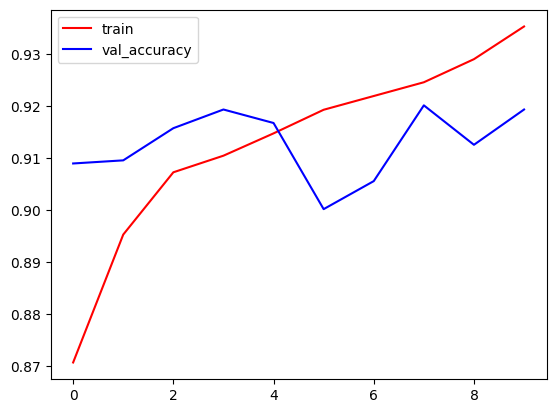

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue', label = 'val_accuracy')
plt.legend()
plt.show()

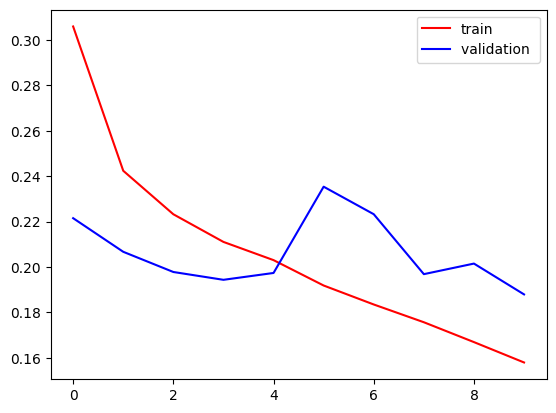

In [18]:
plt.plot(history.history['loss'],color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label = 'validation ')
plt.legend()
plt.show()